In [2]:
# Add Code Directory (TEMPORY FIX)
import sys
sys.path.append('/home/jhrag/Code')

In [3]:
import numpy as np
from NI_simulation.modules import ni_sim
from scipy import signal
from matplotlib import pyplot as plt
from scipy.io import wavfile
import scipy.io

%load_ext autoreload
%autoreload 2

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='Distance (m)', ylabel='Distance (m)'>)

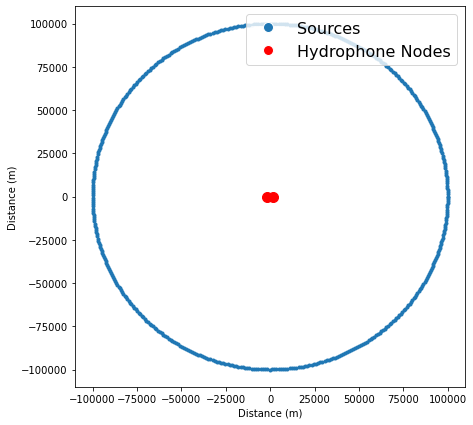

In [4]:
sources = ni_sim.source_distribution2D().uniform_circular(100000,(0,0),500)
env = ni_sim.environment(sources, time_length = 900)
env.plot_env()

In [5]:
xA, xB = env.get_signals()

(-2.2, -1.8)

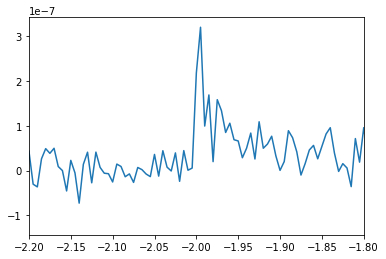

In [19]:
R = signal.fftconvolve(xA, np.flip(xB), mode='full')
tx = np.linspace(-env.time_length, env.time_length, len(R))
plt.plot(tx, R)
plt.xlim([-2.2,-1.8])

## Add Extra Column to sources df

In [52]:
source_distribution = ni_sim.source_distribution2D()
sources = source_distribution.uniform_circular(10000,(0,0), 300)

In [53]:
source_distribution.add_fin_sources()
source_distribution.sources

,X,Y,label
0,10000.000000,0.000000e+00,gauss
1,9997.792141,2.101245e+02,gauss
2,9991.169538,4.201562e+02,gauss
3,9980.135116,6.300024e+02,gauss
4,9964.693747,8.395704e+02,gauss
...,...,...,...
296,9980.135116,-6.300024e+02,gauss
297,9991.169538,-4.201562e+02,gauss
298,9997.792141,-2.101245e+02,gauss
299,10000.000000,-2.449294e-12,gauss


(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='Distance (m)', ylabel='Distance (m)'>)

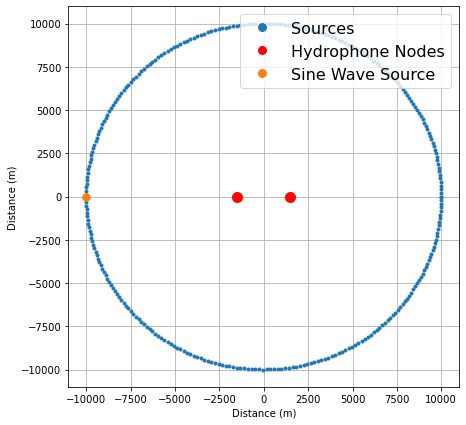

In [54]:
env = ni_sim.environment(source_distribution.sources, time_length = 1800)
env.plot_env()

In [55]:
xA, xB = env.get_signals()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
R = signal.fftconvolve(xA, np.flip(xB))
tx = np.linspace(-env.time_length, env.time_length, len(R))
plt.plot(tx, R)
plt.xlim([-5,5])

## Add Fin Whale File

In [4]:
Fs, fin = wavfile.read('./atlfin_128_64_0-50-FinWhaleAtlantic-10x.wav',)

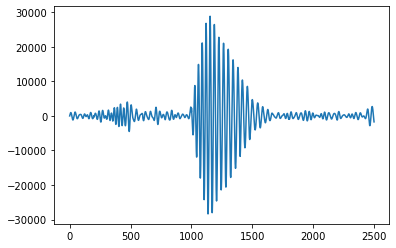

In [5]:
plt.plot(fin[26000:28500])

In [6]:
fin200 = signal.decimate(fin, 4,zero_phase=True)

In [7]:
print(fin.shape)
print(fin200.shape)

(147908,)
(36977,)


In [8]:
np.round(len(env.t)/len(fin200))

NameError: name 'env' is not defined

In [9]:
fin200_expanded = np.tile(fin,(10,))
print(fin200_expanded.shape)
print(fin200.shape)

(1479080,)
(36977,)


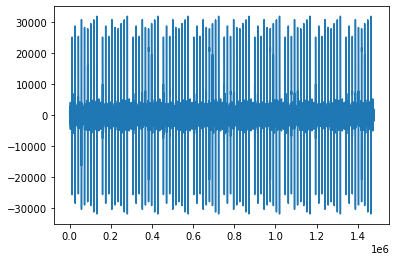

In [10]:
plt.plot(fin200_expanded)

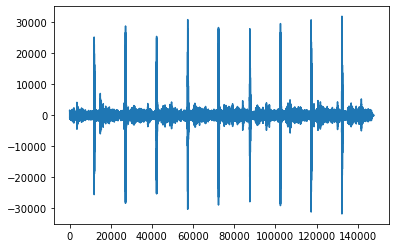

In [46]:
plt.plot(fin)

## debug

In [11]:
source_distribution = ni_sim.source_distribution2D()
source_distribution.endfire_circle(10,10000,100)
source_distribution.add_fin_sources()
sources = source_distribution.sources


(-10000.0, 10000.0)

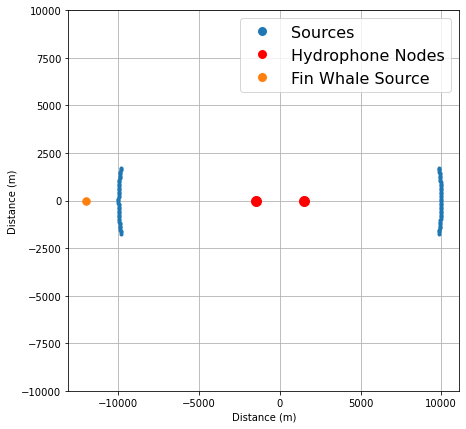

In [12]:
env = ni_sim.environment(sources)
xA, xB = env.get_signals_1cpu(sources)
env.plot_env()
plt.ylim([-10000, 10000])

(-3.0, -1.0)

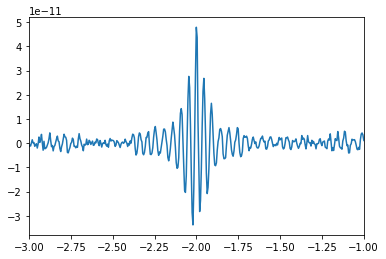

In [15]:
R = signal.fftconvolve(xA, np.flip(xB))
tx = np.linspace(-env.time_length, env.time_length, len(R))
plt.plot(tx,R)
plt.xlim([-3,-1])

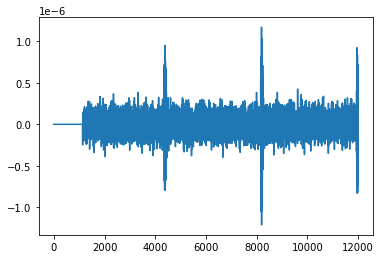

In [133]:
plt.plot(xA)